In [1]:
%reset -f
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
import sys
sys.path.insert(0,"..")
from profiler import *
from utils import *
from datasets import *
from models import *
from transforms import *
import torch.nn as nn
import torch.optim as optim
import torchaudio
from torch.utils.data import Dataset, ConcatDataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms
torchaudio.set_audio_backend('soundfile')

Available workers: 16


# Raspberry-Pi Data

In [7]:
model = DrosophilaNetRAW(outputs=2, dropout_p=.2)
optimizer = optim.Adam(model.parameters(), lr=0.001, eps=1e-3, amsgrad=True)
model, optimizer = load_checkpoint(f'{BASE_DATACREATEDDIR}/model_best.pth.tar', model, optimizer)
model = model.to('cuda', dtype=torch.float)

In [9]:
dspath = "/home/kalfasyan/data/wingbeats/wingbeats_20211129/wingbeats_correct_dates/Melanogaster_202111_RPi"

#"/home/kalfasyan/data/wingbeats/Flytrap_rpi/Backup_rpi_freeflight_20210328/20210328/wingbeats"
#44100#"/home/kalfasyan/data/wingbeats/twin_cages_experiment/sensorPi/freeflight"
#48000#"/home/kalfasyan/data/wingbeats/Flytrap_rpi/Backup_rpi_freeflight_20210328/20210402/wingbeats"
#48000#"/home/kalfasyan/data/wingbeats/Flytrap_rpi/Backup_rpi_freeflight_20210328/20210328/wingbeats"
wbpf = WingbeatDatasetProfiler(dsname=dspath, custom_label=[0], rpiformat=True)

maxpeaks = 15
minpeaks = 1
maxscore = 12
minscore = 3.5
selection = f"peaks>{minpeaks} & peaks<{maxpeaks} & score>{minscore} & score<={maxscore}"
wbpf.df = wbpf.df.query(selection)
# wbpf.plot_random_wbts()
# print(wbpf.df.shape[0])

evaluate_data(wbpf.df, model)

Found 127 in dataset: /home/kalfasyan/Dropbox/kuleuven/wingbeats_20211129/wingbeats_correct_dates/Melanogaster_202111_RPi, and 1 label(s): ['wingbeats_correct_dates']
Label(s) changed to [0]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..


Testing..	: 100%|██████████| 3/3 [00:00<00:00,  8.72it/s]

Finished.
Accuracy: 10.59
Balanced accuracy: 10.59
Confusion matrix: 
[[0.10588235 0.89411765]
 [0.         0.        ]]
1    76
0     9
dtype: int64



/home/kalfasyan/anaconda3/envs/wbai/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


# SD card data

In [10]:
%reset -f
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config Completer.use_jedi = False

In [11]:
import sys
sys.path.insert(0,"..")
from profiler import *
from utils import *
from datasets import *
from models import *
from transforms import *
import torch.nn as nn
import torch.optim as optim
import torchaudio
from torch.utils.data import Dataset, ConcatDataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms
torchaudio.set_audio_backend('soundfile')

In [12]:
model = DrosophilaNetRAW(outputs=2, dropout_p=.2)
optimizer = optim.Adam(model.parameters(), lr=0.001, eps=1e-3, amsgrad=True)
model, optimizer = load_checkpoint(f'{BASE_DATACREATEDDIR}/model_best.pth.tar', model, optimizer)
model = model.to('cuda', dtype=torch.float)

In [13]:
dspath = "/home/kalfasyan/data/wingbeats/wingbeats_20211129/wingbeats_correct_dates/Melanogaster_202111_SD"
wbpf = WingbeatDatasetProfiler(dsname=dspath, custom_label=[0], rpiformat=False)

maxpeaks = 15
minpeaks = 1
maxscore = 12
minscore = 3.5
selection = f"peaks>{minpeaks} & peaks<{maxpeaks} & score>{minscore} & score<={maxscore}"
wbpf.df = wbpf.df.query(selection)

Found 11136 in dataset: /home/kalfasyan/Dropbox/kuleuven/wingbeats_20211129/wingbeats_correct_dates/Melanogaster_202111_SD, and 1 label(s): ['wingbeats_correct_dates']
Label(s) changed to [0]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..
Finished.


In [14]:
evaluate_data(wbpf.df,model)

Testing..	: 100%|██████████| 185/185 [00:05<00:00, 32.00it/s]

Accuracy: 62.34
Balanced accuracy: 62.34
Confusion matrix: 
[[0.62341182 0.37658818]
 [0.         0.        ]]
0    3680
1    2223
dtype: int64



/home/kalfasyan/anaconda3/envs/wbai/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [15]:
extra_df = pd.read_parquet('../data_created/suzmel_extra.parquet')
evaluate_data(extra_df, model)

Testing..	: 100%|██████████| 711/711 [00:21<00:00, 32.67it/s]

Accuracy: 96.35
Balanced accuracy: 92.91
Confusion matrix: 
[[0.89078498 0.10921502]
 [0.03254218 0.96745782]]
1    20998
0     1746
dtype: int64


# UMAP

In [11]:
import umap

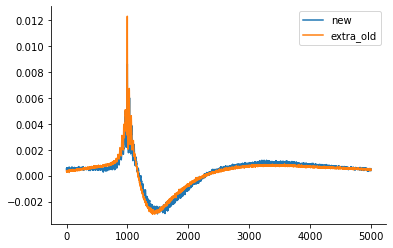

In [12]:
tmp = wbpf.df.x.apply(lambda x: open_wingbeat(x).numpy().squeeze())
newdata = pd.DataFrame(np.stack(tmp))
newdata.median().plot(); 

tmp = extra_df.x.apply(lambda x: open_wingbeat(x).numpy().squeeze())
xtradata = pd.DataFrame(np.stack(tmp))
xtradata.median().plot();

plt.legend(['new','extra_old'])